# Visualization module example demo notebook

## Objective

This notebook presents a small usage example for the visualization of ChangeEvent objects. A ChangeEvent objects represents an event of change which has been extracted from point cloud time series data using different change methods. To run this notebook it is recommended to clone [this repository}](https://github.com/3dgeo-heidelberg/py4dgeo/tree/visualization_module) to a local directory on your computer.

## Data
The module takes a GeoJSON defining visualization parameters a GeoJSON containing metadata for ChangeEvents as input. A small test dataset used in this notebook is downloaded from [this folder](https://heibox.uni-heidelberg.de/f/7eaf90f07b8b4f748c23/). The dataset represents a rockfall event recorded in three subsequent epochs of a point cloud time series.

You can use your own anaconda environment or generate a new one using the `py4dgeo/visualization.yml` file.

First, we start by setting up the Python environment (make sure your Python environment has these modules installed).

In [31]:
# import required modules
import os
import numpy as np
import shutil
import requests
import tempfile
import zipfile
import sys
from pathlib import Path

Next, the test data used in this notebook is downloaded to a temporary local directory. You can also use your own data and directly specify the location of your input JSON files (see below).

In [37]:
# Url for download of data
url = "https://heibox.uni-heidelberg.de/f/230b5dfe0af743d59b35/?dl=1"

# Path to subfolder with dataset used in this notebook
subdir_path = "change_visualization_test_data"

# Generate temporary directory for data
temp_dir = tempfile.mkdtemp()

try:
    # download data
    response = requests.get(url)
    response.raise_for_status()

    # store zip archive in temp dir
    zip_path = os.path.join(temp_dir, "change_visualization_test_data.zip")
    with open(zip_path, "wb") as zip_file:
        zip_file.write(response.content)
    
    # unpack zip archive in subfolder
    with zipfile.ZipFile(zip_path, "r") as zip_ref:

        file_list = [f for f in zip_ref.namelist() if f.startswith(subdir_path)]
        zip_ref.extractall(temp_dir, members=file_list)

    # specify data path
    data_path = os.path.join(temp_dir, subdir_path)
    print(f'Data stored at temp folder: {data_path}')

except requests.exceptions.RequestException as e:
    print(f"Failed to download data: {e}")
except zipfile.BadZipFile as e:
    print(f"Failed to unpack data: {e}")

# Check if the specified path exists
if not os.path.isdir(data_path):
    print(f'ERROR: {data_path} does not exist')
    print('Please specify the correct path to the data directory by replacing <path-to-data> above.')

# Sub-directory containing the input json files
change_events_data_filepath = os.path.join(data_path, 'change_events.json')
plotting_parameters_filepath = os.path.join(data_path, 'plotting_parameters_3dplot.json') # select from available json files
visualization_filtering_parameters_filepath = os.path.join(data_path, 'visualization_filtering_parameters.json')

# If you use your own data, skip the previous code of this code block and directly specify the location of your input JSON files:
#plotting_parameters_filepath = r"filepath"  # replace by your filepath
#plotting_parameters_filepath = r"filepath" # replace by your filepath
#visualization_filtering_parameters_filepath = r"filepath" # replace by your filepath

# Note: Since we are working in a temporary directory, you might need to adjust the absolute file paths of the "pc_files" parameter in the "change_event.json" every time to newly run this code block.
# When working with your own data, make sure to have the correct path to your point cloud data specfied in the "pc_files" parameter in the  change_event.json

Data stored at temp folder: C:\Users\ep413\AppData\Local\Temp\tmp6_7bxznw\change_visualization_test_data


## Loading input data
Now we can run the workflow for visualizing the change events objects. First, we will read the visualization parameters and generate ChangeEvent objects from externally provided GeoJSON files.

In [38]:
# Append system path by directory of visualization module (to be replaced)
sys.path.append(str(Path(os.getcwd()).parent / "src" / "py4dgeo"))
# Import change visualization module
from change_visualization import *  

# Get visualization filtering parameters
visualization_filter_parameters = read_visualization_filter_parameters(visualization_filtering_parameters_filepath)

# Read change event data, validate json file and generate ChangeEvent objects
json_data = read_json_file(change_events_data_filepath)
change_events = ChangeEventValidator.validate_and_create_change_events(json_data)

print(f'{len(change_events)} ChangeEvent object(s) generated: {change_events}')

2 ChangeEvent object(s) generated: [<ChangeEvent object_id=1 pc_files=['C:\\Users\\ep413\\AppData\\Local\\Temp\\tmp6_7bxznw\\change_visualization_tes… timestamps=['2023-11-09-11-20-23', '2023-11-09-11-21-00', '2023-11-09-11-21-50'] epoch_count=3 change_rates=[0.1, 0.2, 0.3] duration=87.0 change_magnitudes=[5.0, 8.0, 12.0] spatial_extent=[[1.97, 3.06], [1.95, -0.62], [1.29, -0.26], [1.46, -3.29]] event_type='rockfall' plots_2d_dir=[] plots_3d_dir=[] plots_4d_dir=[]>, <ChangeEvent object_id=2 pc_files=['C:\\Users\\ep413\\AppData\\Local\\Temp\\tmp6_7bxznw\\change_visualization_tes… timestamps=['2023-11-10-11-20-23', '2023-11-10-11-21-00', '2023-11-10-11-20-30'] epoch_count=3 change_rates=[0.2, 0.3, 0.4] duration=57.0 change_magnitudes=[4.0, 7.0, 10.0] spatial_extent=[[1.97, 3.06], [1.95, -0.62], [1.29, -0.26], [1.46, -3.29]] event_type='landslide' plots_2d_dir=[] plots_3d_dir=[] plots_4d_dir=[]>]


## Filtering relevant ChangeEvent objects
Next, we filter ChangeEvent objects which meet the criteria defined in the visualization filtering parameter file.

In [39]:
# Filter relevant ChangeEvent objects for visualization
# In this dataset, only 1 ChangeEvent object fullfills the criteria
relevant_change_events = filter_relevant_events(change_events, visualization_filter_parameters)
print(f'{len(relevant_change_events)} ChangeEvent object(s) filtered for visualization: {relevant_change_events}')

1 ChangeEvent object(s) filtered for visualization: [<ChangeEvent object_id=1 pc_files=['C:\\Users\\ep413\\AppData\\Local\\Temp\\tmp6_7bxznw\\change_visualization_tes… timestamps=['2023-11-09-11-20-23', '2023-11-09-11-21-00', '2023-11-09-11-21-50'] epoch_count=3 change_rates=[0.1, 0.2, 0.3] duration=87.0 change_magnitudes=[5.0, 8.0, 12.0] spatial_extent=[[1.97, 3.06], [1.95, -0.62], [1.29, -0.26], [1.46, -3.29]] event_type='rockfall' plots_2d_dir=[] plots_3d_dir=[] plots_4d_dir=[]>]


## Change visualization
Finally, we visualize the filtered ChangeEvent objects according to the plotting parameters defined in the plotting parameters input file. Additionally, all generated plots are stored in `.../output_visualization` relative to the notebook's local directory.

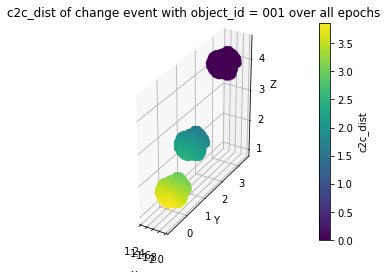

In [40]:
# Generate plots for all change events after validating plotting parameters
plot_type, json_data = read_plotting_parameters(plotting_parameters_filepath)
for change_event in relevant_change_events:
    plot_object = Plot()
    plot_object.generate_plot(plot_type, json_data, change_event)
